In [1]:
!pip install python-dotenv


In [2]:
###importing all dependancies
import numpy as np
import pandas as pd
from pathlib import Path
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
# Upload "hourly_grid_prices.csv" into Colab, then store in a DataFrame
#from google.colab import files
#uploaded = files.upload()

In [4]:
#reading in the DF
df=pd.read_csv(Path('../Resources/Crime_Data_from_2020_to_Present.csv'))

In [5]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
# convert date column to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

C:\Users\philk\AppData\Local\Temp\ipykernel_47408\571149151.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           752911 non-null  int64         
 1   Date Rptd       752911 non-null  object        
 2   DATE OCC        752911 non-null  datetime64[ns]
 3   TIME OCC        752911 non-null  int64         
 4   AREA            752911 non-null  int64         
 5   AREA NAME       752911 non-null  object        
 6   Rpt Dist No     752911 non-null  int64         
 7   Part 1-2        752911 non-null  int64         
 8   Crm Cd          752911 non-null  int64         
 9   Crm Cd Desc     752911 non-null  object        
 10  Mocodes         649650 non-null  object        
 11  Vict Age        752911 non-null  int64         
 12  Vict Sex        654681 non-null  object        
 13  Vict Descent    654675 non-null  object        
 14  Premis Cd       752902 non-null  flo

In [8]:
#creating new DF only holding crime codes and thier description
code_crime=df[["Crm Cd", "Crm Cd Desc", "DATE OCC"]]
code_crime

,Crm Cd,Crm Cd Desc,DATE OCC
0,624,BATTERY - SIMPLE ASSAULT,2020-01-08
1,624,BATTERY - SIMPLE ASSAULT,2020-01-01
2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,2020-02-13
3,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2020-01-01
4,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2020-01-01
...,...,...,...
752906,662,"BUNCO, GRAND THEFT",2023-05-25
752907,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2023-01-26
752908,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-03-22
752909,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-04-12


In [9]:
options = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926, 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]

# selecting rows based on condition
Vcrimes_df = code_crime[code_crime['Crm Cd'].isin(options)]

print('\nResult code_crime :\n', Vcrimes_df)


Result code_crime :
         Crm Cd                                     Crm Cd Desc   DATE OCC
0          624                        BATTERY - SIMPLE ASSAULT 2020-01-08
1          624                        BATTERY - SIMPLE ASSAULT 2020-01-01
5          121                                  RAPE, FORCIBLE 2020-01-01
11         930          CRIMINAL THREATS - NO WEAPON DISPLAYED 2020-01-05
15         626               INTIMATE PARTNER - SIMPLE ASSAULT 2020-11-30
...        ...                                             ...        ...
752893     624                        BATTERY - SIMPLE ASSAULT 2023-06-07
752897     236           INTIMATE PARTNER - AGGRAVATED ASSAULT 2023-02-02
752900     626               INTIMATE PARTNER - SIMPLE ASSAULT 2023-05-29
752908     230  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 2023-03-22
752909     230  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT 2023-04-12

[228865 rows x 3 columns]


C:\Users\philk\AppData\Local\Temp\ipykernel_47408\2168998719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vcrimes_df['DATE OCC'] = pd.to_datetime(Vcrimes_df['DATE OCC'])
C:\Users\philk\AppData\Local\Temp\ipykernel_47408\2168998719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vcrimes_df['Year'] = Vcrimes_df['DATE OCC'].dt.year #Use the dt accessor to extract the year from the 'Date Occ' column


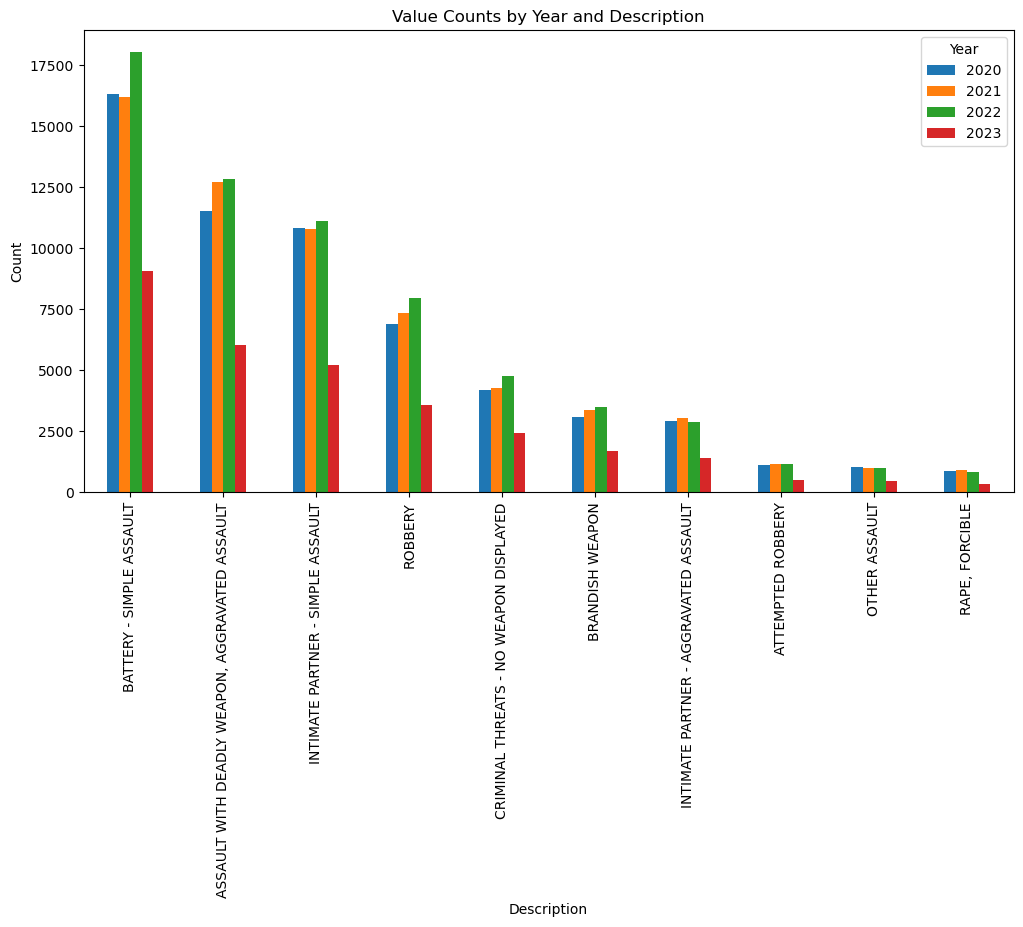

In [10]:
# Convert 'DATE OCC' to datetime objects if it's not already
Vcrimes_df['DATE OCC'] = pd.to_datetime(Vcrimes_df['DATE OCC'])

# Extract the year from the 'DATE OCC' column
Vcrimes_df['Year'] = Vcrimes_df['DATE OCC'].dt.year #Use the dt accessor to extract the year from the 'Date Occ' column

# Group by 'year' and 'description' columns and get value counts for each year and description
value_counts_by_year_description = Vcrimes_df.groupby(['Year', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Display the value counts separated by year and description in ascending order by year
value_counts_by_year_description_sorted=value_counts_by_year_description.sort_index()

# Sort the descriptions by count for each year
sorted_descriptions = value_counts_by_year_description_sorted.sum().sort_values(ascending=False).index

# Sort the descriptions by count across all years
sorted_descriptions = value_counts_by_year_description_sorted.sum().sort_values(ascending=False).head(10).index

# Plot the value counts in a bar graph with each description for each year next to each other
value_counts_by_year_description_sorted = value_counts_by_year_description_sorted[sorted_descriptions]
value_counts_by_year_description_sorted.T.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Value Counts by Year and Description')
plt.xlabel('Description')
plt.ylabel('Count')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()

In [11]:
# @title Distribution of Crime Codes

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Vcrimes_df' is your DataFrame
crime_counts = Vcrimes_df['Crm Cd Desc'].value_counts()
crime_counts

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                   59630
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             43149
INTIMATE PARTNER - SIMPLE ASSAULT                          37947
ROBBERY                                                    25784
CRIMINAL THREATS - NO WEAPON DISPLAYED                     15690
BRANDISH WEAPON                                            11650
INTIMATE PARTNER - AGGRAVATED ASSAULT                      10249
ATTEMPTED ROBBERY                                           3933
OTHER ASSAULT                                               3503
RAPE, FORCIBLE                                              2985
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                     2819
BATTERY POLICE (SIMPLE)                                     2078
SHOTS FIRED AT INHABITED DWELLING                           1411
CRIMINAL HOMICIDE                                           1288
SEXUAL PENETRATION W/FOREIGN OBJECT                         1082
ASSAULT WITH 

In [12]:
start_date = pd.Timestamp('2020-03-19')
end_date = pd.Timestamp('2021-01-25')
Vcrimes_df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
Vcrimes_df['Lockdown'] = (Vcrimes_df['DATE OCC'] >= start_date) & (df['DATE OCC'] < end_date)
Vcrimes_df

C:\Users\philk\AppData\Local\Temp\ipykernel_47408\781575938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vcrimes_df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
C:\Users\philk\AppData\Local\Temp\ipykernel_47408\781575938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vcrimes_df['Lockdown'] = (Vcrimes_df['DATE OCC'] >= start_date) & (df['DATE OCC'] < end_date)


,Crm Cd,Crm Cd Desc,DATE OCC,Year,Lockdown
0,624,BATTERY - SIMPLE ASSAULT,2020-01-08,2020,False
1,624,BATTERY - SIMPLE ASSAULT,2020-01-01,2020,False
5,121,"RAPE, FORCIBLE",2020-01-01,2020,False
11,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2020-01-05,2020,False
15,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-11-30,2020,True
...,...,...,...,...,...
752893,624,BATTERY - SIMPLE ASSAULT,2023-06-07,2023,False
752897,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2023-02-02,2023,False
752900,626,INTIMATE PARTNER - SIMPLE ASSAULT,2023-05-29,2023,False
752908,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-03-22,2023,False


In [13]:
Vcrimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228865 entries, 0 to 752909
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Crm Cd       228865 non-null  int64         
 1   Crm Cd Desc  228865 non-null  object        
 2   DATE OCC     228865 non-null  datetime64[ns]
 3   Year         228865 non-null  int32         
 4   Lockdown     228865 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 8.1+ MB


In [14]:

#creating new DF only holding crime codes and thier description and lockdown period.
code_crimeLD=Vcrimes_df[["Crm Cd", "Crm Cd Desc", "DATE OCC", 'Lockdown']]


# selecting rows based on condition
Vcrimes_df_LD = code_crimeLD[code_crimeLD['Crm Cd'].isin(options)]


#C_Lockdown_Crm=Vcrimes_df_LD[Vcrimes_df_LD['Lockdown'] == True]

#Non_Lockdown_Crm=Vcrimes_df_LD[Vcrimes_df_LD['Lockdown'] == False]


<Figure size 1000x600 with 0 Axes>

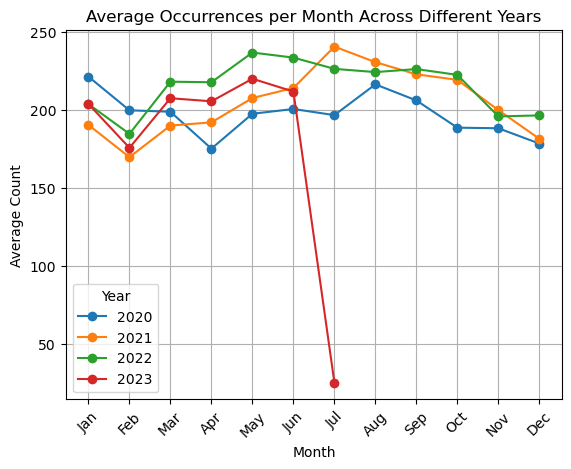

In [15]:
# Extract month and year
Vcrimes_df_LD['month'] = Vcrimes_df_LD['DATE OCC'].dt.month
Vcrimes_df_LD['year'] = Vcrimes_df_LD['DATE OCC'].dt.year

# Group by year, month, and crime description, then calculate the count
monthly_counts = Vcrimes_df_LD.groupby(['year', 'month', 'Crm Cd Desc'])['Crm Cd'].count().reset_index(name='count')

# Calculate the average count for each month
monthly_avg = monthly_counts.groupby(['month', 'year'])['count'].mean().reset_index() #Added 'year' to groupby 

# Pivot the DataFrame to have years as columns
pivot_table = monthly_avg.pivot(index='month', columns='year', values='count') # Changed monthly_avg to monthly_counts

# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(marker='o')
plt.title('Average Occurrences per Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year')
plt.grid()
plt.show()

C:\Users\philk\AppData\Local\Temp\ipykernel_47408\2505065165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vcrimes_df['month'] = Vcrimes_df['DATE OCC'].dt.month # Extract month from the 'DATE OCC' column


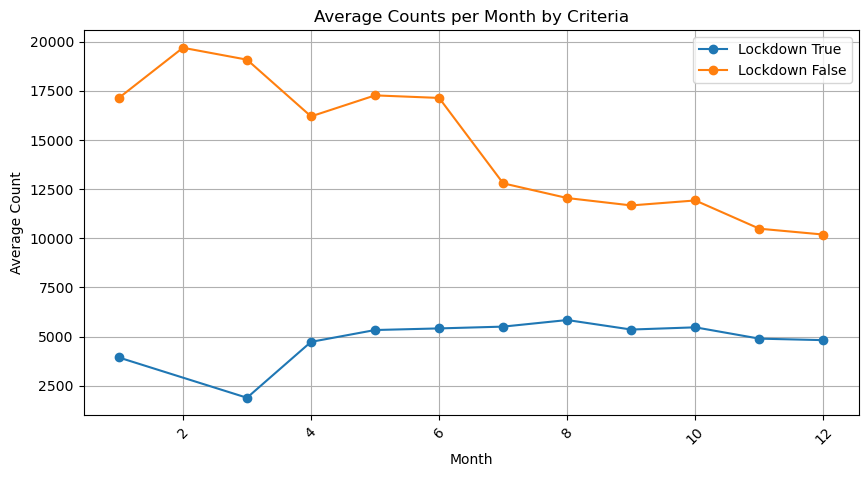

In [16]:
# Calculate average counts per month for true criteria
Vcrimes_df['month'] = Vcrimes_df['DATE OCC'].dt.month # Extract month from the 'DATE OCC' column
In_CovidLD_avg = Vcrimes_df[Vcrimes_df['Lockdown'] == True].groupby('month').size().reset_index(name='count') # Calculate the size of each group and rename it to 'count'

# Calculate average counts per month for false criteria
Non_CovidLD_avg = Vcrimes_df[Vcrimes_df['Lockdown'] == False].groupby('month').size().reset_index(name='count')# Calculate the size of each group and rename it to 'count'

# Combine the two DataFrames
avg_counts = pd.concat([In_CovidLD_avg, Non_CovidLD_avg])

# Plotting
plt.figure(figsize=(10, 5))
# Since 'criteria' column doesn't exist, we'll modify the plotting logic
plt.plot(In_CovidLD_avg['month'], In_CovidLD_avg['count'], marker='o', label='Lockdown True')
plt.plot(Non_CovidLD_avg['month'], Non_CovidLD_avg['count'], marker='o', label='Lockdown False')

plt.title('Average Counts per Month by Criteria')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [17]:
Vcrimes_df[["Crm Cd", "DATE OCC"]].groupby("Crm Cd")['DATE OCC'].count().sort_values(ascending=False).head(10)

Crm Cd
624    59630
230    43149
626    37947
210    25784
930    15690
761    11650
236    10249
220     3933
625     3503
121     2985
Name: DATE OCC, dtype: int64

In [18]:
Vcrimes_df

,Crm Cd,Crm Cd Desc,DATE OCC,Year,Lockdown,month
0,624,BATTERY - SIMPLE ASSAULT,2020-01-08,2020,False,1
1,624,BATTERY - SIMPLE ASSAULT,2020-01-01,2020,False,1
5,121,"RAPE, FORCIBLE",2020-01-01,2020,False,1
11,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2020-01-05,2020,False,1
15,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-11-30,2020,True,11
...,...,...,...,...,...,...
752893,624,BATTERY - SIMPLE ASSAULT,2023-06-07,2023,False,6
752897,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2023-02-02,2023,False,2
752900,626,INTIMATE PARTNER - SIMPLE ASSAULT,2023-05-29,2023,False,5
752908,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-03-22,2023,False,3


In [19]:
display(Vcrimes_df[['DATE OCC','Crm Cd Desc']].value_counts())

DATE OCC    Crm Cd Desc                                     
2020-05-30  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER        95
2022-09-27  BATTERY - SIMPLE ASSAULT                            86
2020-01-01  INTIMATE PARTNER - SIMPLE ASSAULT                   85
2022-10-08  BATTERY - SIMPLE ASSAULT                            83
2020-07-04  BATTERY - SIMPLE ASSAULT                            81
                                                                ..
2021-10-26  BATTERY POLICE (SIMPLE)                              1
2021-10-25  STALKING                                             1
            SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT     1
            RESISTING ARREST                                     1
2023-07-03  SHOTS FIRED AT INHABITED DWELLING                    1
Name: count, Length: 20445, dtype: int64

Create table of crimes violent crimes according to the LA City Public Safety Crime codes for  Violent Crimes

In [20]:
Vcrimes_df

,Crm Cd,Crm Cd Desc,DATE OCC,Year,Lockdown,month
0,624,BATTERY - SIMPLE ASSAULT,2020-01-08,2020,False,1
1,624,BATTERY - SIMPLE ASSAULT,2020-01-01,2020,False,1
5,121,"RAPE, FORCIBLE",2020-01-01,2020,False,1
11,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2020-01-05,2020,False,1
15,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-11-30,2020,True,11
...,...,...,...,...,...,...
752893,624,BATTERY - SIMPLE ASSAULT,2023-06-07,2023,False,6
752897,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2023-02-02,2023,False,2
752900,626,INTIMATE PARTNER - SIMPLE ASSAULT,2023-05-29,2023,False,5
752908,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-03-22,2023,False,3


In [21]:
# Slice data for a specific date range California Covid Lockdown dates.
start_date = '2020-03-19'
end_date = '2021-01-25'
mask = (df['DATE OCC'] > start_date) & (df['DATE OCC'] <= end_date)
Covid_data = Vcrimes_df.loc[mask]

# Display the sliced data
Covid_data

,Crm Cd,Crm Cd Desc,DATE OCC,Year,Lockdown,month
15,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-11-30,2020,True,11
16,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-11-28,2020,True,11
28,624,BATTERY - SIMPLE ASSAULT,2020-10-15,2020,True,10
32,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-07-29,2020,True,7
37,624,BATTERY - SIMPLE ASSAULT,2020-08-27,2020,True,8
...,...,...,...,...,...,...
408114,624,BATTERY - SIMPLE ASSAULT,2021-01-02,2021,True,1
408304,624,BATTERY - SIMPLE ASSAULT,2021-01-16,2021,True,1
408306,626,INTIMATE PARTNER - SIMPLE ASSAULT,2021-01-18,2021,True,1
408334,626,INTIMATE PARTNER - SIMPLE ASSAULT,2021-01-01,2021,True,1


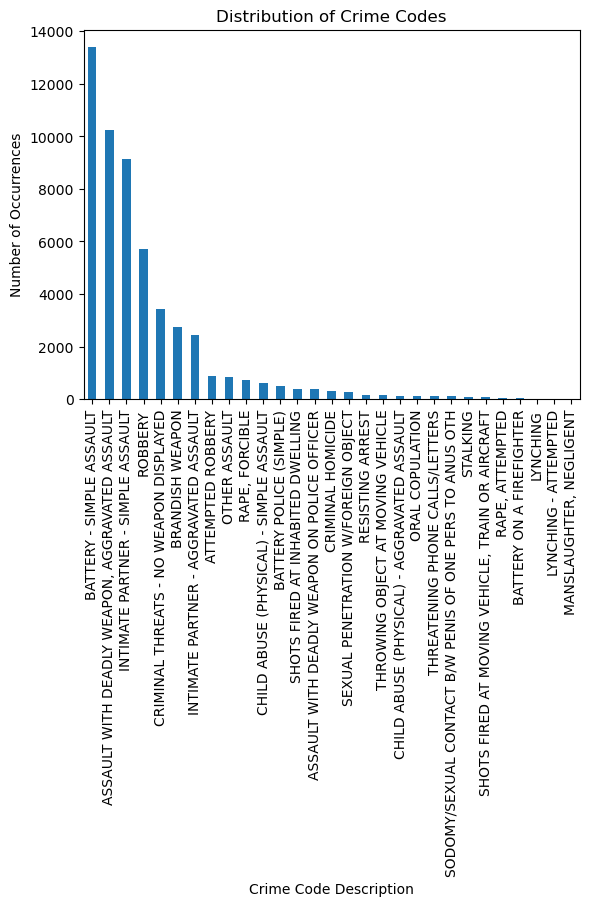

In [22]:
# Assuming 'Vcrimes_df' is your DataFrame
Covid_crime_counts = Covid_data['Crm Cd Desc'].value_counts()

Covid_crime_counts.plot(kind='bar')
plt.xlabel('Crime Code Description')
plt.ylabel('Number of Occurrences')
_ = plt.title('Distribution of Crime Codes')

In [23]:
Covid_crime_counts.describe()

count       29.000000
mean      1834.965517
std       3440.676382
min          4.000000
25%        107.000000
50%        326.000000
75%        902.000000
max      13389.000000
Name: count, dtype: float64

In [24]:
#Vcrimes_df['DATE OCC']=Vcrimes_df['DATE OCC'].dt.year
Vcrimes_df

,Crm Cd,Crm Cd Desc,DATE OCC,Year,Lockdown,month
0,624,BATTERY - SIMPLE ASSAULT,2020-01-08,2020,False,1
1,624,BATTERY - SIMPLE ASSAULT,2020-01-01,2020,False,1
5,121,"RAPE, FORCIBLE",2020-01-01,2020,False,1
11,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,2020-01-05,2020,False,1
15,626,INTIMATE PARTNER - SIMPLE ASSAULT,2020-11-30,2020,True,11
...,...,...,...,...,...,...
752893,624,BATTERY - SIMPLE ASSAULT,2023-06-07,2023,False,6
752897,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2023-02-02,2023,False,2
752900,626,INTIMATE PARTNER - SIMPLE ASSAULT,2023-05-29,2023,False,5
752908,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-03-22,2023,False,3


In [25]:
Vcrimesyears=Vcrimes_df.groupby('DATE OCC')['Crm Cd Desc'].value_counts()
Vcrimesyears

DATE OCC    Crm Cd Desc                                   
2020-01-01  INTIMATE PARTNER - SIMPLE ASSAULT                 85
            BATTERY - SIMPLE ASSAULT                          74
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    47
            ROBBERY                                           29
            RAPE, FORCIBLE                                    21
                                                              ..
2023-07-03  BRANDISH WEAPON                                    5
            CRIMINAL THREATS - NO WEAPON DISPLAYED             4
            INTIMATE PARTNER - AGGRAVATED ASSAULT              3
            ATTEMPTED ROBBERY                                  2
            SHOTS FIRED AT INHABITED DWELLING                  1
Name: count, Length: 20445, dtype: int64

In [26]:
Vcrimesyear_df=Vcrimes_df.groupby(['Crm Cd Desc', 'DATE OCC']).size().reset_index(name='count')
Vcrimesyear_df

,Crm Cd Desc,DATE OCC,count
0,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2020-01-05,1
1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2020-02-09,1
2,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2020-02-13,2
3,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2020-02-21,2
4,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,2020-02-25,6
...,...,...,...
20440,THROWING OBJECT AT MOVING VEHICLE,2023-06-11,1
20441,THROWING OBJECT AT MOVING VEHICLE,2023-06-12,1
20442,THROWING OBJECT AT MOVING VEHICLE,2023-06-17,1
20443,THROWING OBJECT AT MOVING VEHICLE,2023-06-25,3


In [27]:
Vcrimesyear_df=Vcrimesyear_df.groupby('DATE OCC').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
Vcrimesyear_df

C:\Users\philk\AppData\Local\Temp\ipykernel_47408\628749860.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Vcrimesyear_df=Vcrimesyear_df.groupby('DATE OCC').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


,Crm Cd Desc,DATE OCC,count
0,INTIMATE PARTNER - SIMPLE ASSAULT,2020-01-01,85
1,BATTERY - SIMPLE ASSAULT,2020-01-01,74
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2020-01-01,47
3,ROBBERY,2020-01-01,29
4,"RAPE, FORCIBLE",2020-01-01,21
...,...,...,...
6395,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-07-03,19
6396,BATTERY - SIMPLE ASSAULT,2023-07-03,16
6397,ROBBERY,2023-07-03,14
6398,INTIMATE PARTNER - SIMPLE ASSAULT,2023-07-03,11


In [28]:
Vcrimesyear_df['Crm_Yr']=Vcrimesyear_df['DATE OCC'].astype(str)+ ' - ' +Vcrimesyear_df['Crm Cd Desc']
Vcrimesyear_df

,Crm Cd Desc,DATE OCC,count,Crm_Yr
0,INTIMATE PARTNER - SIMPLE ASSAULT,2020-01-01,85,2020-01-01 - INTIMATE PARTNER - SIMPLE ASSAULT
1,BATTERY - SIMPLE ASSAULT,2020-01-01,74,2020-01-01 - BATTERY - SIMPLE ASSAULT
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2020-01-01,47,"2020-01-01 - ASSAULT WITH DEADLY WEAPON, AGGRA..."
3,ROBBERY,2020-01-01,29,2020-01-01 - ROBBERY
4,"RAPE, FORCIBLE",2020-01-01,21,"2020-01-01 - RAPE, FORCIBLE"
...,...,...,...,...
6395,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2023-07-03,19,"2023-07-03 - ASSAULT WITH DEADLY WEAPON, AGGRA..."
6396,BATTERY - SIMPLE ASSAULT,2023-07-03,16,2023-07-03 - BATTERY - SIMPLE ASSAULT
6397,ROBBERY,2023-07-03,14,2023-07-03 - ROBBERY
6398,INTIMATE PARTNER - SIMPLE ASSAULT,2023-07-03,11,2023-07-03 - INTIMATE PARTNER - SIMPLE ASSAULT


<Axes: xlabel='Crm_Yr'>

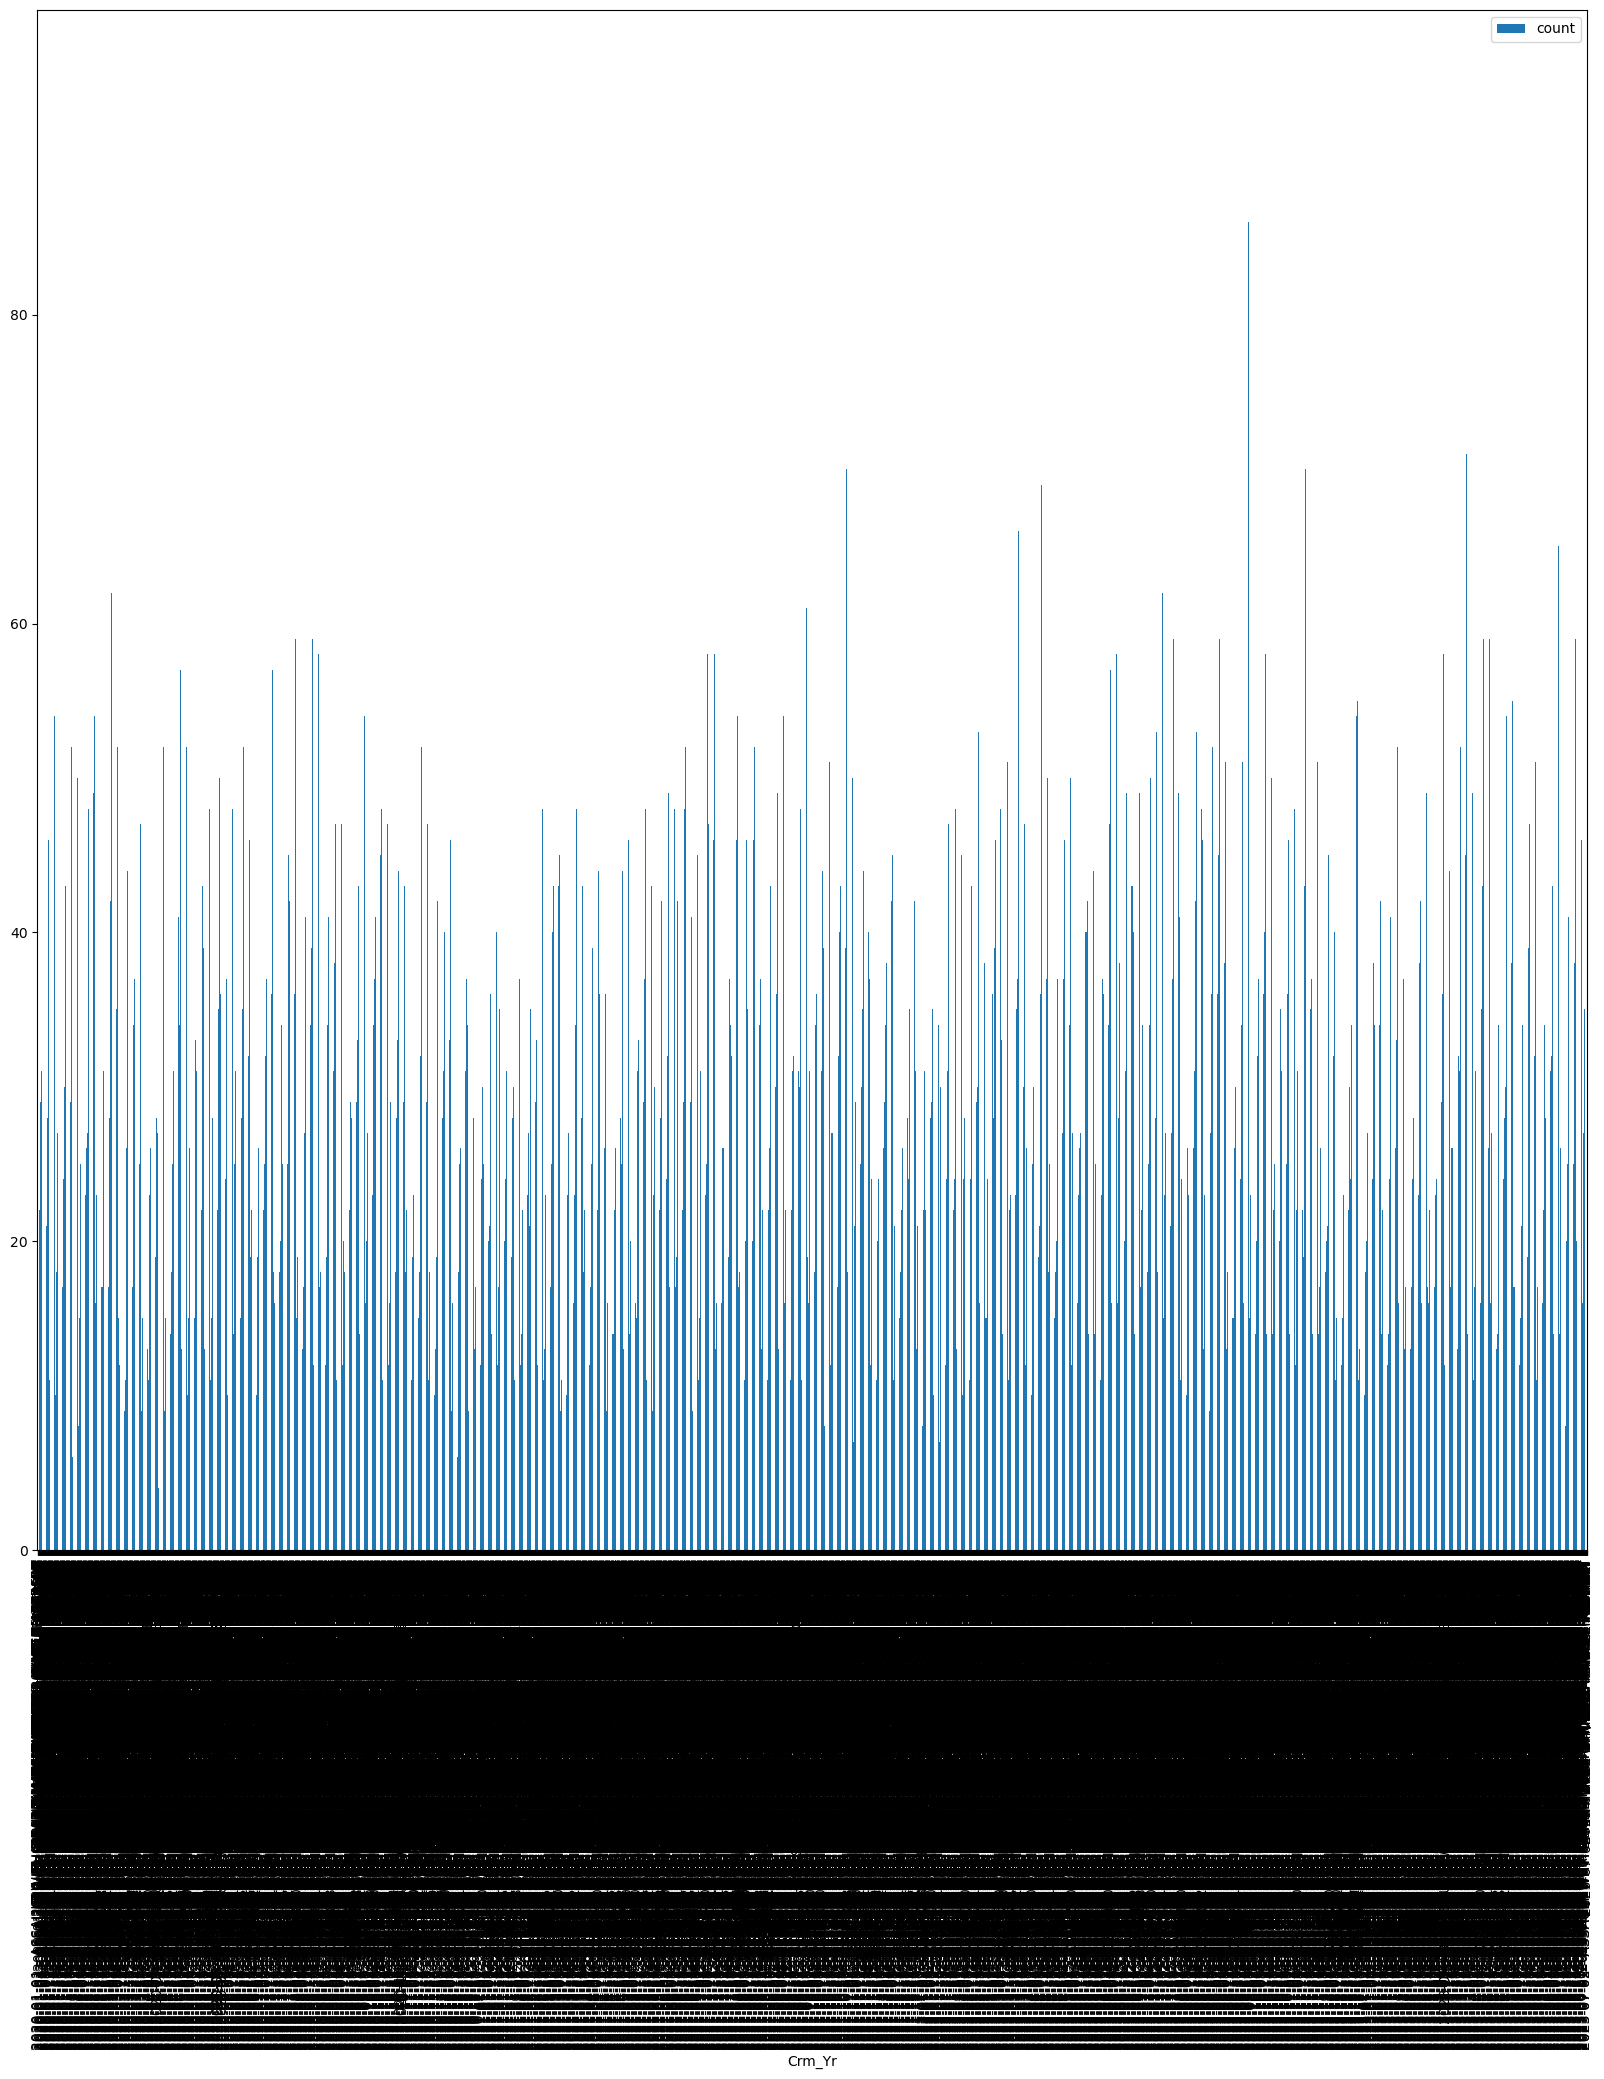

In [29]:
Vcrimesyear_df.plot(x="Crm_Yr", y="count", kind="bar", figsize=(20, 20))

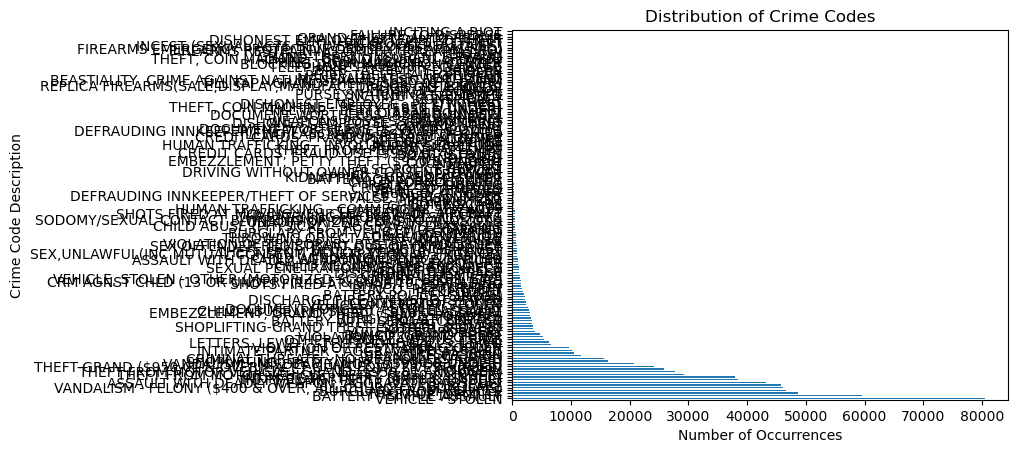

In [30]:
# @title Distribution of Crime Codes

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
crime_counts = df['Crm Cd Desc'].value_counts()

crime_counts.plot(kind='barh')
plt.xlabel('Number of Occurrences')
plt.ylabel('Crime Code Description')
_ = plt.title('Distribution of Crime Codes')